In [1]:
import asyncio
import sys

if sys.platform == 'win32':
    asyncio.set_event_loop_policy(asyncio.WindowsSelectorEventLoopPolicy())

Task 2.1: Summary Statistics & Missing-Value Report

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('../../data/raw/benin-malanville.csv')
# Task 2.1.1: Summary statistics
summary_stats = df.describe()
print("Summary Statistics:")
display(summary_stats)
# Task 2.1.2: Missing values
missing_count = df.isna().sum()
missing_percent = (missing_count / len(df)) * 100
cols_over_5pct_null = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:")
print(cols_over_5pct_null)

Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


Columns with >5% missing values:
Comments    100.0
dtype: float64


Task 2.2: Outlier Detection & Cleaning

2.2.1: Missing value, outlier, and inccoret data entries

Missing values in key columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


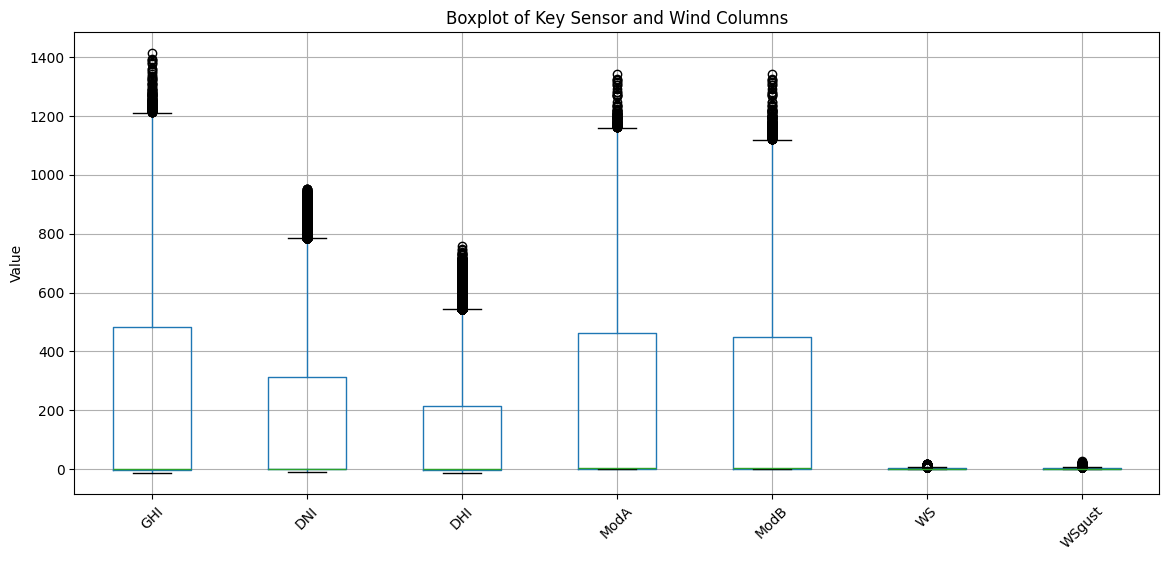

Count of negative (incorrect) entries in each column:
GHI       258847
DNI       275987
DHI       259182
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


In [3]:
import matplotlib.pyplot as plt

# check for missing values in key columns
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
missing_report = df[cols].isna().sum()
print("Missing values in key columns:")
print(missing_report)

# check for outliers in key columns
plt.figure(figsize=(14, 6))
df[cols].boxplot()
plt.title('Boxplot of Key Sensor and Wind Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()
# Check for negative values (not physically possible)
negatives = (df[cols] < 0).sum()
print("Count of negative (incorrect) entries in each column:")
print(negatives)


2.2.2: Compute Z-scores

In [4]:
from scipy.stats import zscore

cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores for the selected columns
z_scores = df[cols].apply(zscore)

# Flag rows where any column has |Z| > 3
outlier_rows = (z_scores.abs() > 3).any(axis=1)

print(f"Number of rows with at least one outlier (|Z| > 3): {outlier_rows.sum()}")
print("Indices of outlier rows:")
print(df.index[outlier_rows].tolist())

Number of rows with at least one outlier (|Z| > 3): 7740
Indices of outlier rows:
[670, 671, 672, 673, 674, 675, 676, 677, 717, 718, 719, 721, 722, 723, 724, 725, 726, 727, 745, 746, 749, 750, 751, 752, 753, 754, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 835, 836, 837, 838, 839, 840, 841, 842, 844, 849, 850, 2958, 2959, 4999, 5000, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5024, 5025, 5026, 5060, 5061, 5132, 5183, 5184, 5185, 5186, 5187, 5188, 5189, 5190, 5191, 5192, 5193, 5194, 5195, 5196, 5197, 5198, 5199, 6544, 6547, 6548, 6549, 6550, 6551, 6552, 6553, 6554, 6555, 6556, 6557, 6558, 6559, 6560, 6561, 6562, 6563, 6564, 6565, 6566, 6567, 6569, 6570, 6574, 6575, 6576, 6577, 6578, 6579

2.2.3. Drop or impute (median) missing values

In [5]:
#Impute missing values with median
df[cols] = df[cols].fillna(df[cols].median())
print("Missing values after imputation (should be 0):")
print(df[cols].isna().sum())

Missing values after imputation (should be 0):
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64


2.2.4:  Export the cleaned dataset

In [6]:
# Export the cleaned DataFrame to CSV
df.to_csv('../../data/clean/benin_clean.csv')

Task 2.3: Time Series Analysis

2.3.1: Line charts

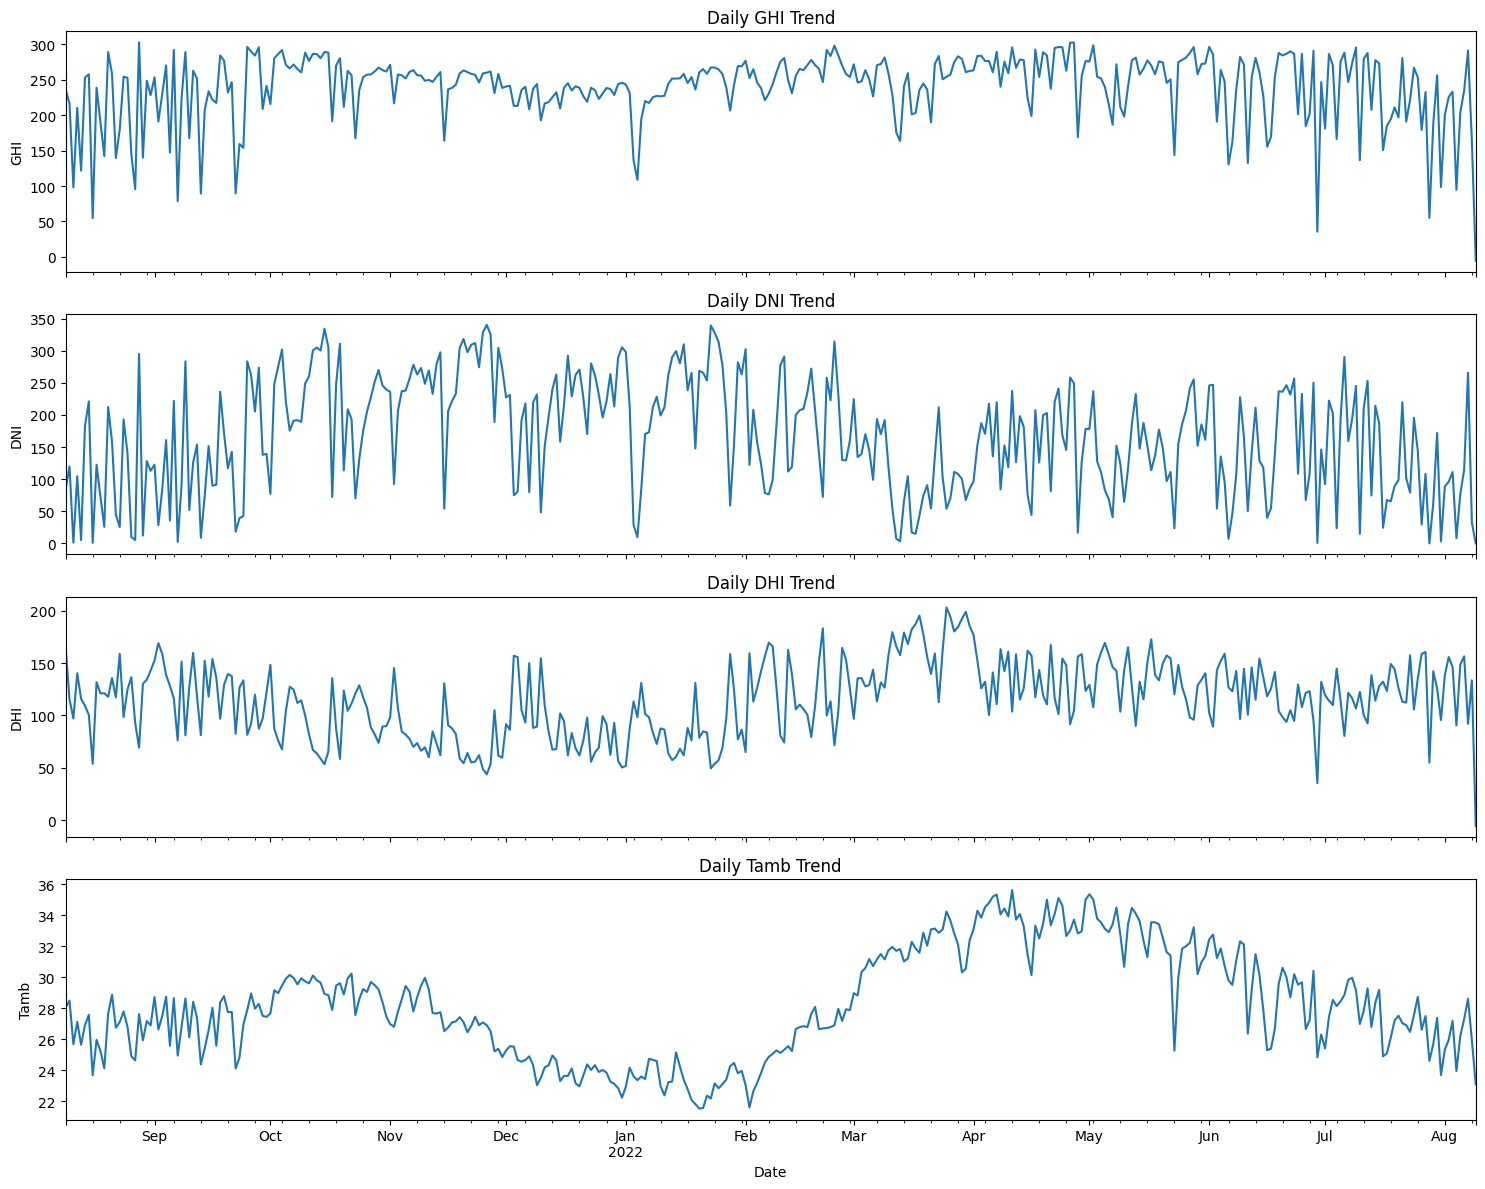

In [7]:
# If 'Timestamp' is already the index, reset it first
if df.index.name == 'Timestamp':
    df.reset_index(inplace=True)

# Convert 'Timestamp' to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Plot daily trends for GHI, DNI, DHI, Tamb
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
metrics = ['GHI', 'DNI', 'DHI', 'Tamb']
for i, metric in enumerate(metrics):
    df[metric].resample('D').mean().plot(ax=axes[i], title=f'Daily {metric} Trend')
    axes[i].set_ylabel(metric)
plt.xlabel('Date')
plt.tight_layout()
plt.show()

2.3.2: Observe patterns
A. Monthly Patterns

<Figure size 1200x600 with 0 Axes>

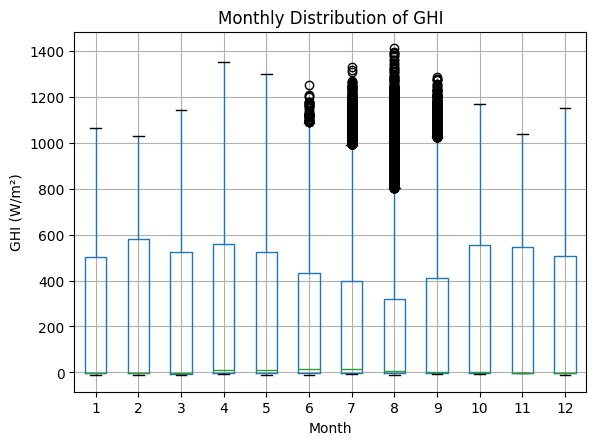

In [8]:
# Add a 'Month' column for grouping
df['Month'] = df.index.month

plt.figure(figsize=(12, 6))
df.boxplot(column='GHI', by='Month')
plt.title('Monthly Distribution of GHI')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('GHI (W/m²)')
plt.show()

B. Daily Trends

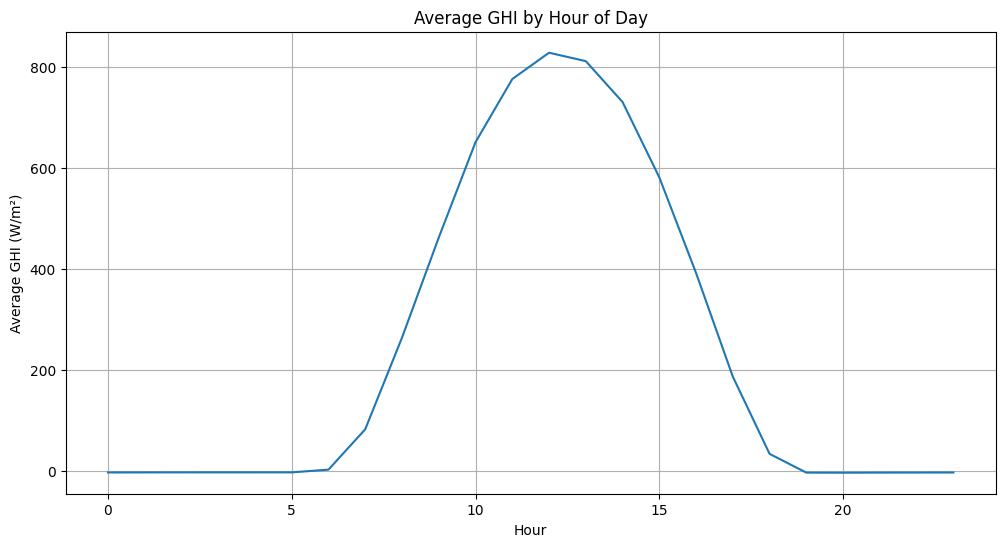

In [9]:
df['Hour'] = df.index.hour

plt.figure(figsize=(12, 6))
df.groupby('Hour')['GHI'].mean().plot()
plt.title('Average GHI by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Average GHI (W/m²)')
plt.grid(True)
plt.show()

C. Anomalies: Peaks and Fluctuations

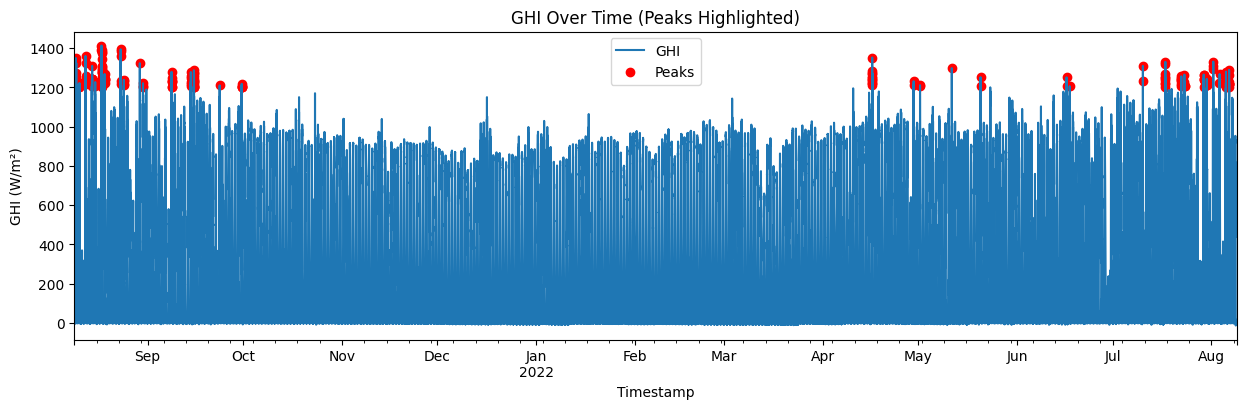

In [10]:
plt.figure(figsize=(15, 4))
df['GHI'].plot()
plt.title('GHI Over Time (Peaks Highlighted)')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Timestamp')
# Highlight peaks above a threshold (e.g., 1200 W/m²)
peaks = df[df['GHI'] > 1200]
plt.scatter(peaks.index, peaks['GHI'], color='red', label='Peaks')
plt.legend()
plt.show()

Task 2.4: Cleaning Impact Analysis

<Figure size 800x400 with 0 Axes>

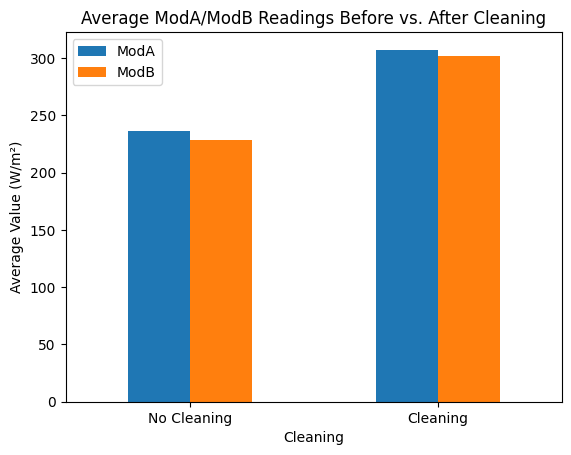

In [11]:
# Group by Cleaning flag
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean().reset_index()

# Plot comparison
plt.figure(figsize=(8, 4))
cleaning_impact.set_index('Cleaning').plot(kind='bar', rot=0)
plt.title('Average ModA/ModB Readings Before vs. After Cleaning')
plt.xticks([0, 1], ['No Cleaning', 'Cleaning'])
plt.ylabel('Average Value (W/m²)')
plt.show()

Task 2.5: Correlation & Relationships

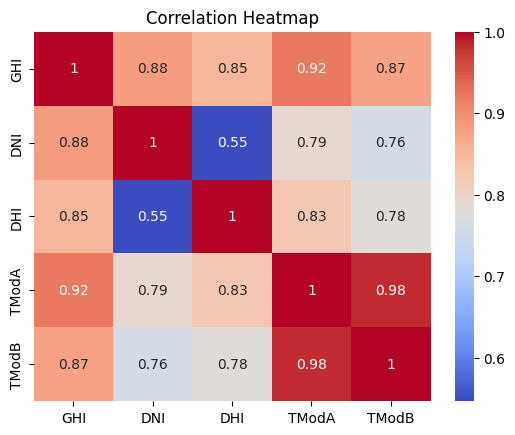

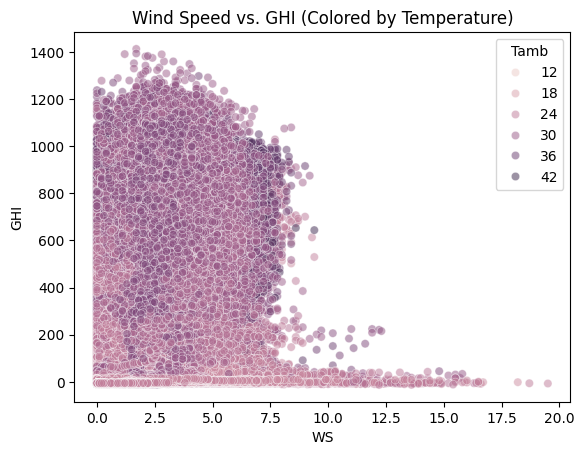

In [12]:
import seaborn as sns

# Heatmap
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plots
sns.scatterplot(data=df, x='WS', y='GHI', hue='Tamb', alpha=0.5)
plt.title('Wind Speed vs. GHI (Colored by Temperature)')
plt.show()

Task 2.6: Wind & Distribution Analysis

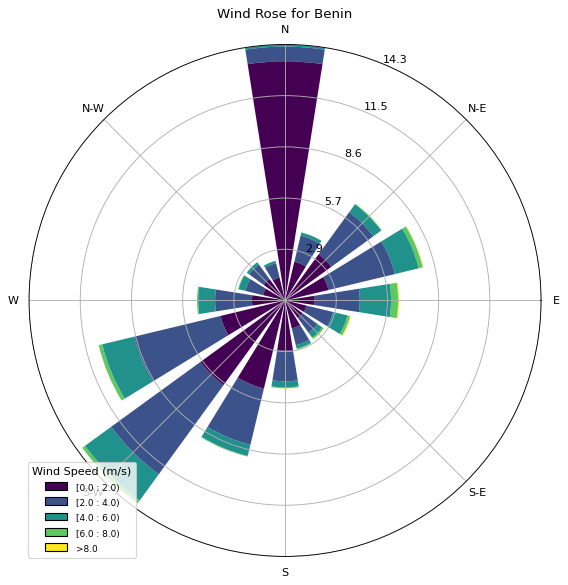

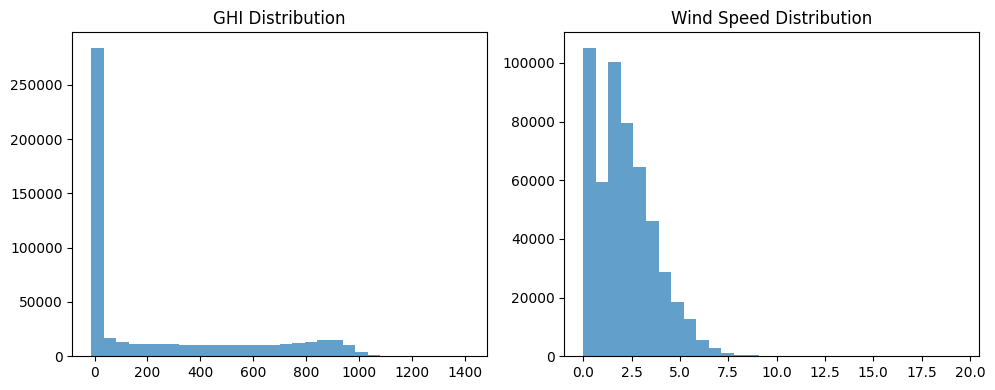

In [13]:
# Wind Rose (Install windrose: pip install windrose)
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, bins=np.arange(0, 10, 2))
ax.set_legend(title='Wind Speed (m/s)')
plt.title('Wind Rose for Benin')
plt.show()

# Histograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['GHI'], bins=30, alpha=0.7)
plt.title('GHI Distribution')

plt.subplot(1, 2, 2)
plt.hist(df['WS'], bins=30, alpha=0.7)
plt.title('Wind Speed Distribution')
plt.tight_layout()
plt.show()

Task 2.7: Temperature Analysis

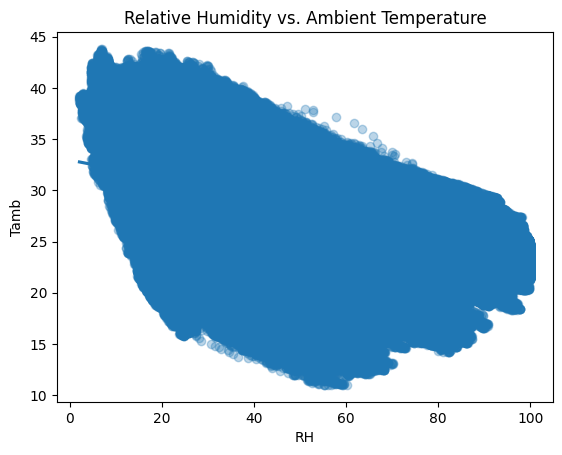

In [14]:
# RH vs. Tamb
sns.regplot(data=df, x='RH', y='Tamb', scatter_kws={'alpha': 0.3})
plt.title('Relative Humidity vs. Ambient Temperature')
plt.show()

Task 2.8: Bubble Chart

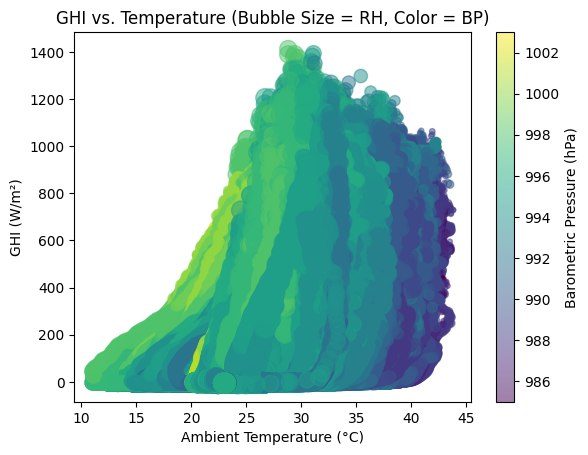

In [15]:
plt.scatter(
    x=df['Tamb'], 
    y=df['GHI'], 
    s=df['RH']*2,  # Bubble size = RH
    c=df['BP'],     # Color = BP
    alpha=0.5,
    cmap='viridis'
)
plt.colorbar(label='Barometric Pressure (hPa)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs. Temperature (Bubble Size = RH, Color = BP)')
plt.show()